# Basic NLP 

By [Leonardo Tozo](https://www.linkedin.com/in/leotozo/)

****************************
Hello,
<br>This is part of my personal portfolio, my intention with this series of notebooks is to keep practicing and improving my A.I & Machine Learning skills.
 
*Leonardo Tozo Bisinoto*
<br>*MBA in Artificial Intelligence & Machine Learning*
<br>*LinkedIn: https://www.linkedin.com/in/leotozo/*
<br>*Github: https://github.com/leotozo*
**************************** 

## Load data

In [2]:
import pandas as pd

df = pd.read_csv("articles.csv", encoding='utf-8')

df.describe()

,title,text,date,category,subcategory,link
count,167053,166288,167053,167053,29635,167053
unique,164119,165901,987,48,293,167053
top,Quadrinhos,"Toda segunda-feira, ""Tec"" divulga os mais lega...",2015-03-15,poder,olimpiada-no-rio,http://www1.folha.uol.com.br/esporte/2015/01/1...
freq,627,25,285,22022,2859,1


In [3]:
df.head()

,title,text,date,category,subcategory,link
0,"Lula diz que está 'lascado', mas que ainda tem...",Com a possibilidade de uma condenação impedir ...,2017-09-10,poder,NaN,http://www1.folha.uol.com.br/poder/2017/10/192...
1,"'Decidi ser escrava das mulheres que sofrem', ...","Para Oumou Sangaré, cantora e ativista malines...",2017-09-10,ilustrada,NaN,http://www1.folha.uol.com.br/ilustrada/2017/10...
2,Três reportagens da Folha ganham Prêmio Petrob...,Três reportagens da Folha foram vencedoras do ...,2017-09-10,poder,NaN,http://www1.folha.uol.com.br/poder/2017/10/192...
3,Filme 'Star Wars: Os Últimos Jedi' ganha trail...,A Disney divulgou na noite desta segunda-feira...,2017-09-10,ilustrada,NaN,http://www1.folha.uol.com.br/ilustrada/2017/10...
4,CBSS inicia acordos com fintechs e quer 30% do...,"O CBSS, banco da holding Elopar dos sócios Bra...",2017-09-10,mercado,NaN,http://www1.folha.uol.com.br/mercado/2017/10/1...


## NULL values and percentage

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167053 entries, 0 to 167052
Data columns (total 6 columns):
title          167053 non-null object
text           166288 non-null object
date           167053 non-null object
category       167053 non-null object
subcategory    29635 non-null object
link           167053 non-null object
dtypes: object(6)
memory usage: 7.6+ MB


In [5]:
df.shape

(167053, 6)

In [6]:
df.isnull().sum()

title               0
text              765
date                0
category            0
subcategory    137418
link                0
dtype: int64

In [7]:
df.isnull().sum()/df.shape[0]

title          0.000000
text           0.004579
date           0.000000
category       0.000000
subcategory    0.822601
link           0.000000
dtype: float64

## Removing lines with NULL values

In [8]:
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29611 entries, 43 to 167037
Data columns (total 6 columns):
title          29611 non-null object
text           29611 non-null object
date           29611 non-null object
category       29611 non-null object
subcategory    29611 non-null object
link           29611 non-null object
dtypes: object(6)
memory usage: 1.6+ MB


## Categories from the Dataset 

In [9]:
df.category.value_counts()

colunas                  21619
esporte                   2859
tv                        2123
sobretudo                 1057
poder                      939
saopaulo                   471
paineldoleitor             260
empreendedorsocial         150
o-melhor-de-sao-paulo       71
cotidiano                   35
multimidia                  27
Name: category, dtype: int64

In [1]:
df.category.value_counts().plot(kind='bar', figsize=(3,3))

NameError: name 'df' is not defined

## Show the 10 most occurring words

In [11]:
from collections import Counter

c = Counter()


In [12]:
df.title.str.lower().str.split(" ").apply(c.update)
c.most_common(10)

[('de', 12532),
 ('e', 5778),
 ('a', 5614),
 ('o', 4651),
 ('do', 4468),
 ('em', 3980),
 ('da', 3928),
 ('para', 3311),
 ('que', 3058),
 ('no', 2773)]

In [13]:
print('Colunas: ', c.get('colunas'))
print('Esporte: ', c.get('esporte'))
print('TV: ', c.get('tv'))
print('Sobretudo: ', c.get('sobretudo'))

Colunas:  2
Esporte:  60
TV:  116
Sobretudo:  1


In [14]:
c.get('decidi')

1

## Word Cloud

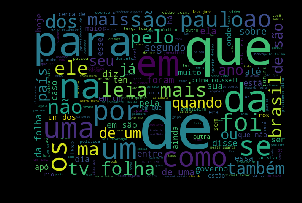

In [34]:
import nltk
import matplotlib.pyplot as plt

try:
  from wordcloud import WordCloud
except:
  !pip install wordcloud
  

articles_words = ''

articles = df[df.category == 'tv']


for val in articles.text:
    text = val.lower()
    for words in text:
        articles_words = articles_words + words

# Generate a word cloud image
articles_wordcloud = WordCloud(width=600, height=400).generate(articles_words)


# Livro Word cloud
plt.figure( figsize=(4,4), facecolor='k')
plt.imshow(articles_wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()